# Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as RF
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# Reading and Understanding the Data

In [2]:
#Reading The csv data file using pandas
df=pd.read_csv("Fraud_check.csv")

In [3]:
#Top 5 data
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
#Number of rows & columns in data.
df.shape

(600, 6)

# Data Description :-

Undergrad : person is under graduated or not.

Marital.Status : marital status of a person.

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government .

Work Experience : Work experience of an individual person.

Urban : Whether that person belongs to urban area or not.

# Thorough Information Of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# Observation:-
1)Undergrad,Marital.Satatus & Urban this 3 variables is of Object type, we have to convert it in numeric.

2)All the other variables is numeric.

3)All variable has total 600 entries , so we can say there is no null/missing values present in data, we will again check for it by boxplot.

In [6]:
df['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [7]:
df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [8]:
df['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

# Observation:-
1) Urban and Undergrad variable is contains only 2 uniques in it, we will use LabelEncoder to convert in numeric.

2) Marital.Status contains 3 unique values in it, will use One Hot Encoding to convert it on numeric type.

In [9]:
from sklearn.preprocessing import LabelEncoder as LE


In [10]:
df=pd.get_dummies(df,columns=['Marital.Status'])

In [11]:
df.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,NO,68833,50047,10,YES,0,0,1
1,YES,33700,134075,18,YES,1,0,0
2,NO,36925,160205,30,YES,0,1,0
3,YES,50190,193264,15,YES,0,0,1
4,NO,81002,27533,28,NO,0,1,0


In [12]:
le=LE()

In [13]:
df['Urban']=le.fit_transform(df['Urban'])

In [14]:
df['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [15]:
df['Undergrad']=le.fit_transform(df['Undergrad'])

In [16]:
df['Undergrad'].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

1) Urban columns value YES replaced as 1 & NO replaced as 0.

2) Undergrad columns value YES replaced as 1 & NO as 0.

3) Marital.Status:- creadted 3 saperate columns of all 3 unique values.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Undergrad                600 non-null    int32
 1   Taxable.Income           600 non-null    int64
 2   City.Population          600 non-null    int64
 3   Work.Experience          600 non-null    int64
 4   Urban                    600 non-null    int32
 5   Marital.Status_Divorced  600 non-null    uint8
 6   Marital.Status_Married   600 non-null    uint8
 7   Marital.Status_Single    600 non-null    uint8
dtypes: int32(2), int64(3), uint8(3)
memory usage: 20.6 KB


In [18]:
df['Taxable.Income'].value_counts

<bound method IndexOpsMixin.value_counts of 0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64>

# treating those who have taxable_income <= 30000 as "Risky"as (0) and others are "Good"(1)

In [19]:
df['Taxable.Income'].head()

0    68833
1    33700
2    36925
3    50190
4    81002
Name: Taxable.Income, dtype: int64

In [20]:
df['Taxable_Income']=np.where(df['Taxable.Income']<= 30000,0,
        np.where(df['Taxable.Income']>30000,1,df['Taxable.Income']))

In [21]:
#Crosschecking replaced values is right or not.
df[['Taxable.Income','Taxable_Income']]

,Taxable.Income,Taxable_Income
0,68833,1
1,33700,1
2,36925,1
3,50190,1
4,81002,1
...,...,...
595,76340,1
596,69967,1
597,47334,1
598,98592,1


In [22]:
#Dropping 
df=df.drop('Taxable.Income',axis=1)

# Checking for missing/Null values

In [23]:
#Numbers of null values present in columns.
df.isna().sum()

Undergrad                  0
City.Population            0
Work.Experience            0
Urban                      0
Marital.Status_Divorced    0
Marital.Status_Married     0
Marital.Status_Single      0
Taxable_Income             0
dtype: int64

There is no null/missing values presend in dataset.

# Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

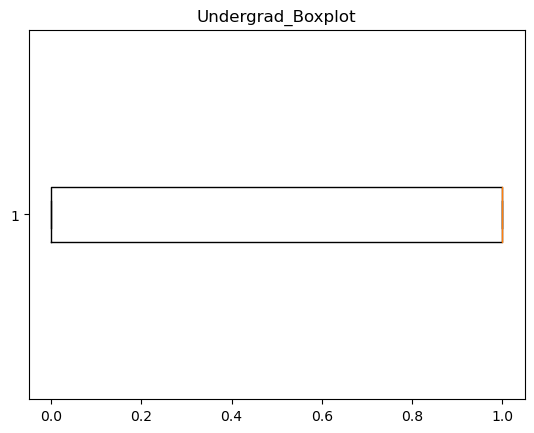

In [24]:
plt.boxplot(df.Undergrad,vert=False)
plt.title('Undergrad_Boxplot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

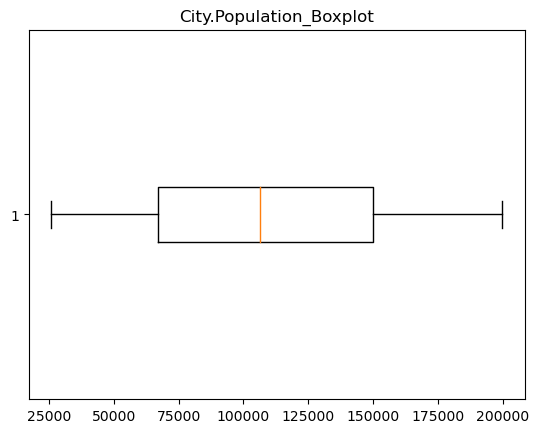

In [25]:
plt.boxplot(df['City.Population'],vert=False)
plt.title('City.Population_Boxplot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

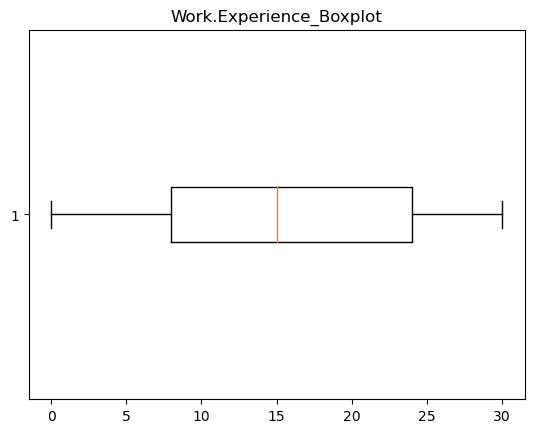

In [26]:
plt.boxplot(df['Work.Experience'],vert=False)
plt.title('Work.Experience_Boxplot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

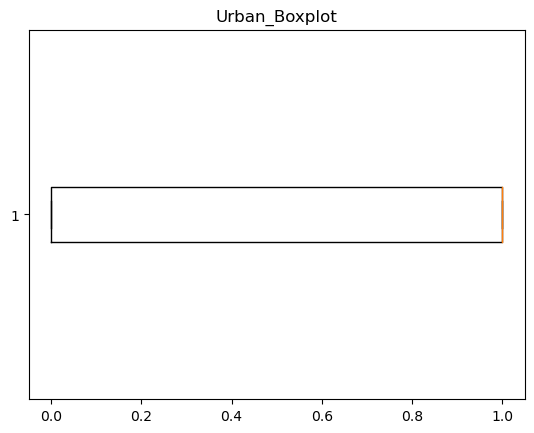

In [27]:
plt.boxplot(df['Urban'],vert=False)
plt.title('Urban_Boxplot')
plt.show

There is no outlier.

# Assigning Independent variables in X and Dependent variable in Y

In [28]:
df.columns

Index(['Undergrad', 'City.Population', 'Work.Experience', 'Urban',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Taxable_Income'],
      dtype='object')

In [29]:
x=df.drop('Taxable_Income',axis=1)
y=df.Taxable_Income

In [30]:
x.shape,y.shape

((600, 7), (600,))

# Train Test Split

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=3)
xtrain.shape ,xtest.shape ,ytrain.shape ,ytest.shape

((420, 7), (180, 7), (420,), (180,))

# Insight
1) data is saperated in 2 part

2) one part is train data which we will use to prepare the model

3) second part is test data on which we will test our model prepared by using train data

4) the ddata is split in 70% - 30% ratio which means 70% of data is in Train data and remaining 30% of data is in test data

# Decision Tree Model

In [32]:
model=RF()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [33]:
model.score(xtrain,ytrain)

1.0

In [34]:
model.score(xtest,ytest)

0.6555555555555556

# confusion_matrix

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
y_pred=model.predict(xtest)

In [42]:
cm=confusion_matrix(ytest,y_pred,labels=(1,0))
cm

array([[108,  30],
       [ 32,  10]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.24      0.24        42
           1       0.77      0.78      0.78       138

    accuracy                           0.66       180
   macro avg       0.51      0.51      0.51       180
weighted avg       0.65      0.66      0.65       180



# GridSearchCV

In [44]:
#importing GridSearchCv
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2,3, 4, 5,], 'min_samples_split': [2,3,4,5,6,7],'max_features':[2,3,4,5,6,7]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [45]:
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'max_depth': 2, 'max_features': 2, 'min_samples_split': 6}
Best score: 0.8047619047619048


In [48]:
model1=RF(max_depth= 2,max_features= 2,min_samples_split= 6)
model1.fit(xtrain , ytrain)

DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=6)

In [49]:
model1.score(xtrain,ytrain)


0.8047619047619048

In [50]:
model1.score(xtest,ytest)


0.7666666666666667

# confusion_matrix

In [51]:
y_pred=model1.predict(xtest)

In [52]:
cm=confusion_matrix(ytest,y_pred,labels=(1,0))
cm

array([[138,   0],
       [ 42,   0]], dtype=int64)

In [53]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.77      1.00      0.87       138

    accuracy                           0.77       180
   macro avg       0.38      0.50      0.43       180
weighted avg       0.59      0.77      0.67       180



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Transformation of data

# 1st:- Standardization

In [54]:
#1st:- standardization 
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
x_train_std=scaler.fit_transform(xtrain)
x_test_std=scaler.transform(xtest)

In [59]:
model2=RF(max_depth= 2,max_features= 2,min_samples_split= 6)
model2.fit(xtrain , ytrain)

DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=6)

In [60]:
model2.score(x_train_std,ytrain)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8047619047619048

In [61]:
model2.score(x_test_std,ytest)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.7666666666666667

In [62]:
y_pred_std=model2.predict(x_test_std)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [63]:
cm_std=confusion_matrix(ytest,y_pred_std,labels=(1,0))
cm_std

array([[138,   0],
       [ 42,   0]], dtype=int64)

In [64]:
print(classification_report(ytest,y_pred_std))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.77      1.00      0.87       138

    accuracy                           0.77       180
   macro avg       0.38      0.50      0.43       180
weighted avg       0.59      0.77      0.67       180



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2nd:- Robust scaler

In [65]:
#2nd:- Robust scaler
from sklearn.preprocessing import RobustScaler
robust=RobustScaler()
x_train_rob=robust.fit_transform(xtrain)
x_test_rob=robust.transform(xtest)

In [66]:
#apply this transforemed date in model
model3 =RF(max_depth= 2,max_features= 2,min_samples_split= 6)
model3.fit(x_train_rob,ytrain)

DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=6)

In [67]:
#score of model on train data
model3.score(x_train_rob,ytrain)

0.8047619047619048

In [68]:
#score of model on train data
model3.score(x_test_rob,ytest)

0.7666666666666667

In [69]:
y_pred_rob=model3.predict(x_test_rob)

In [70]:
cm_rob=confusion_matrix(ytest,y_pred_rob,labels=(1,0))
cm_rob

array([[138,   0],
       [ 42,   0]], dtype=int64)

In [71]:
print(classification_report(ytest,y_pred_rob))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.77      1.00      0.87       138

    accuracy                           0.77       180
   macro avg       0.38      0.50      0.43       180
weighted avg       0.59      0.77      0.67       180



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3rd:- Min Max Scaler

In [72]:
#3rd:- Min Max scaler
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x_train_mm=minmax.fit_transform(xtrain)
x_test_mm=minmax.transform(xtest)

In [75]:
#apply this transforemed date in model
model4 = RF(max_depth =2,max_features= 2,min_samples_split= 6)
model4.fit(x_train_mm,ytrain)

DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=6)

In [76]:
#score of model on train data
model4.score(x_train_mm,ytrain)

0.8095238095238095

In [77]:
#score of model on train data
model4.score(x_test_mm,ytest)

0.75

In [78]:
y_pred_mm=model4.predict(x_test_mm)

In [79]:
cm_mm=confusion_matrix(ytest,y_pred_mm,labels=(1,0))
cm_mm

array([[135,   3],
       [ 42,   0]], dtype=int64)

In [80]:
print(classification_report(ytest,y_pred_mm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.76      0.98      0.86       138

    accuracy                           0.75       180
   macro avg       0.38      0.49      0.43       180
weighted avg       0.58      0.75      0.66       180



# 5th:- square transformation

In [81]:
x_train_s=xtrain**2
x_test_s=xtest**2

In [97]:
#apply this transforemed date in model
model5 =  RF(max_depth= 2,max_features= 2,min_samples_split= 6)
model5.fit(x_train_s,ytrain)

DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=6)

In [98]:
#score of model on train data
model5.score(x_train_s,ytrain)

0.8047619047619048

In [99]:
#score of model on train data
model5.score(x_test_s,ytest)

0.7666666666666667

In [100]:
y_pred_s=model5.predict(x_test_s)

In [101]:
cm_s=confusion_matrix(ytest,y_pred_s,labels=(1,0))
cm_s

array([[138,   0],
       [ 42,   0]], dtype=int64)

In [102]:
print(classification_report(ytest,y_pred_s))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.77      1.00      0.87       138

    accuracy                           0.77       180
   macro avg       0.38      0.50      0.43       180
weighted avg       0.59      0.77      0.67       180



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 6th:- square root transformation

In [103]:
x_train_sr=xtrain**0.5
x_test_sr=xtest**0.5

In [104]:
#apply this transforemed date in model
model6 =  RF(max_depth= 2,max_features= 2,min_samples_split= 6)
model6.fit(x_train_sr,ytrain)

DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_split=6)

In [105]:
#score of model on train data
model6.score(x_train_sr,ytrain)

0.8071428571428572

In [106]:
#score of model on train data
model6.score(x_test_sr,ytest)

0.75

In [107]:
y_pred_sr=model6.predict(x_test_sr)

In [108]:
cm_sr=confusion_matrix(ytest,y_pred_sr,labels=(1,0))
cm_sr

array([[135,   3],
       [ 42,   0]], dtype=int64)

In [109]:
print(classification_report(ytest,y_pred_sr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.76      0.98      0.86       138

    accuracy                           0.75       180
   macro avg       0.38      0.49      0.43       180
weighted avg       0.58      0.75      0.66       180



In [112]:
table={'model_no':['model','model1','model2','model3','model4','model5','model6'],
      'Model Name':['Normal_RF','Best_RF','Std_RF','robsca_RF','mm_RF','Squar_RF','SR_RF'],
      'Train_Score':[model.score(xtrain,ytrain),model1.score(xtrain,ytrain),model2.score(x_train_std,ytrain),model3.score(x_train_rob,ytrain),model4.score(x_train_mm,ytrain),model5.score(x_train_s,ytrain),model6.score(x_train_sr,ytrain)],
      'Test_score':[model.score(xtest,ytest),model1.score(xtest,ytest),model2.score(x_test_std,ytest),model3.score(x_test_rob,ytest),model4.score(x_test_mm,ytest),model5.score(x_test_s,ytest),model6.score(x_test_sr,ytest)]}

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [113]:
pd.DataFrame(table)

,model_no,Model Name,Train_Score,Test_score
0,model,Normal_RF,1.000000,0.655556
1,model1,Best_RF,0.804762,0.766667
2,model2,Std_RF,0.804762,0.766667
3,model3,robsca_RF,0.804762,0.766667
4,model4,mm_RF,0.809524,0.750000
5,model5,Squar_RF,0.804762,0.766667
6,model6,SR_RF,0.807143,0.750000


# Insights:-
1) We got best score (0.77) from model1,model2,model3,model5.

2) We will go with model1 which is RF model applied on data without any tranformation.